# Solutore polinomiale
#### (versione con numpy)

Luca Mari, marzo 2023

Questo solutore approssima funzioni $\mathbb{R} \rightarrow \mathbb{R}$, per esempio $sin(x)$ tra $-\pi$ e $\pi$, mediante un polinomio di grado $n$, di cui stima i parametri.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

Decidi la funzione -- che nella fase di test si supporrà ignota, ovviamente -- da approssimare.

In [17]:
the_fun = lambda x: np.sin(x)   # la funzione da approssimare
the_min = -np.pi                # l'argomento minimo
the_max = np.pi                 # l'argomento massimo
num_pts = 1000

x = np.linspace(the_min, the_max, num_pts)
y = the_fun(x)

Decidi il grado del polinomio, la dimensione del training set e il _learning rate_.

In [18]:
n = 4                           # grado del polinomio approssimante
trainingset_size = 5000         # numero di datapoint per ogni addestramento
learning_rate = 1e-6

Definisci la funzione di addestramento, per prima cosa inizializzando i parametri del polinomio come valori casuali da una gaussiana standard.

In [19]:
def train(x:np.ndarray, y:np.ndarray, n:int, trainingset_size:int, learning_rate:float, log:bool=False) -> np.ndarray:
    w = np.random.standard_normal(size=n)
    poly = np.ndarray((n, len(x)))
    grad = np.ndarray(n)

    if log: print('step\tmse')

    for i in range(trainingset_size):
        for j in range(n): poly[j] = np.power(x, j)         # forward pass
        y_pred = w.T @ poly

        if log:                                             # calcola e visualizza l'errore
            mse = np.square(y_pred - y).sum()
            if i % 1000 == 0: print(f'{i}\t{mse:.5f}')

        grad_y_pred = 2.0 * (y_pred - y)                    # back propagation
        for j in range(n): grad[j] = (grad_y_pred * np.power(x, j)).sum()

        for j in range(n): w[j] -= learning_rate * grad[j]  # aggiorna i pesi
    return w

E finalmente esegui il processo di apprendimento, e quindi calcola e visualizza il polinomio, confrontandolo con la funzione da approssimare.

step	mse
0	3356.98074
1000	223.12194
2000	42.42737
3000	11.06960
4000	5.59329


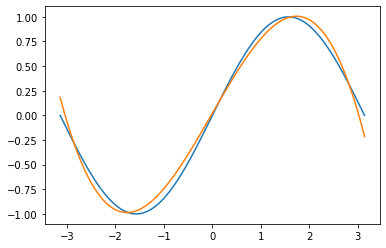

In [20]:
w = train(x, y, n, trainingset_size, learning_rate, True)

yy = np.zeros(num_pts)
for j in range(n): yy += w[j] * np.power(x, j)

plt.plot(x, y)
plt.plot(x, yy)
plt.show()